In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data_dict = pd.read_csv('Data_Dictionary_BYD.csv')
#data_dict
data_dict = data_dict.iloc[:,:3]
data_dict.rename(columns = {'Spreadsheet tab':'dataset', 'Element or value display name':'feature'}, inplace = True)
pd.options.display.max_colwidth = 100
data_dict
#data_dict[data_dict['dataset'] == 'BYD_TMR']


,dataset,feature,Description
0,Surface,Date,Date of surface or core sampling
1,Surface,Barnyard,Designation (number) of each experimental barnyard
2,Surface,Surface,Material used on ground surface of barnyard
3,Surface,Sample_type,Designation of surface sampling or core depth
4,Surface,Dry_matter,"Dry matter after drying at 60 degrees Celsius, as % of total sample by weight"
...,...,...,...
83,Runoff,NO3-N_kg/ha,"Nitrate flux via runoff, kg N/ha"
84,Runoff,DRP_kg/ha,"Dissolved reactive phosphorus flux via runoff, kg P/ha"
85,Runoff,TP_kg/ha,"Total phosphorus flux via runoff, kg P/ha"
86,Runoff,TN_kg/ha,"Total nitrogen flux via runoff, kg N/ha"


# Surface

In [12]:
surface = pd.read_csv('BYD_Surface.csv')
surface['Date'] = pd.to_datetime(surface['Date'], format='%m/%d/%y') #convert string to datetime
surface['Month'] = surface['Date'].dt.month
surface = surface.drop(['Notes'],axis=1)
surface

,Date,Barnyard,Surface,Sample_type,Dry_matter,Water,pH,NH4-N,NO3-N,Total_N,Total_C,Ash,Organic_matter,Month
0,2010-05-26,1,SOIL,NEW,85.63,14.37,7.00,1.060,14.80,0.08,0.84,95.05,4.95,5
1,2010-05-26,2,SOIL,NEW,83.28,16.72,7.39,0.531,23.30,0.08,0.69,95.13,4.87,5
2,2010-05-26,3,SOIL,NEW,85.20,14.80,7.08,0.349,19.00,0.12,1.14,94.35,5.65,5
3,2010-05-26,4,SAND,NEW,99.90,0.10,9.22,0.181,1.12,0.00,1.73,98.91,1.09,5
4,2010-05-26,5,SAND,NEW,99.90,0.10,9.22,0.181,1.12,0.00,1.73,98.91,1.09,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,2015-12-15,9,BARK,MID,35.10,64.90,8.17,8.160,45.30,NaN,NaN,25.63,74.37,12
412,2015-12-15,9,BARK,DEEP,29.38,70.62,8.50,0.000,15.40,NaN,NaN,20.24,79.76,12
413,2015-12-15,9,BARK,SHALLOW,27.48,72.52,8.06,1.510,16.80,NaN,NaN,25.04,74.96,12
414,2015-12-15,9,BARK,MID,28.96,71.04,8.35,0.000,25.60,NaN,NaN,28.52,71.48,12


In [13]:
surface.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            416 non-null    datetime64[ns]
 1   Barnyard        416 non-null    int64         
 2   Surface         416 non-null    object        
 3   Sample_type     416 non-null    object        
 4   Dry_matter      413 non-null    float64       
 5   Water           413 non-null    float64       
 6   pH              404 non-null    float64       
 7   NH4-N           326 non-null    float64       
 8   NO3-N           326 non-null    float64       
 9   Total_N         314 non-null    float64       
 10  Total_C         314 non-null    float64       
 11  Ash             299 non-null    float64       
 12  Organic_matter  299 non-null    float64       
 13  Month           416 non-null    int64         
dtypes: datetime64[ns](1), float64(9), int64(2), object(2)
memo

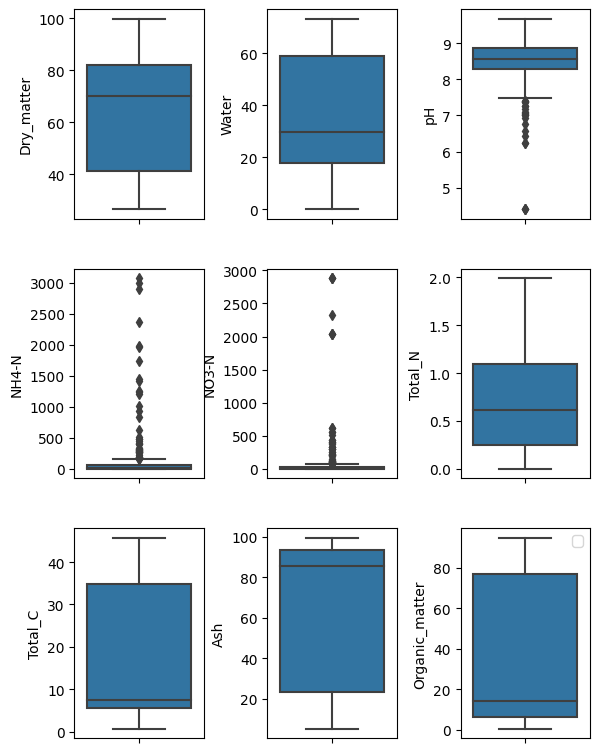

In [24]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(6,8))
fig.tight_layout(pad=1.5)
# Flatten the axs array to make it easier to iterate over
axs = axs.flatten()

# Loop over each numeric column and create a boxplot in the corresponding axis
index = 0
for column in surface.columns:
    if surface[column].dtype == 'float64':
        sns.boxplot(y=surface[column], ax=axs[index])
        #axs[index].axhline(surface[column].mean(), color='r', label='Mean', linestyle='--')
        #axs[index].set_title(column)
        index += 1

plt.legend()

plt.show()

In [25]:
# check null
surface.isnull().sum()

Date                0
Barnyard            0
Surface             0
Sample_type         0
Dry_matter          3
Water               3
pH                 12
NH4-N              90
NO3-N              90
Total_N           102
Total_C           102
Ash               117
Organic_matter    117
Month               0
dtype: int64

## Calculate median surface data groupby Sampling Month and Barnyard number

In [26]:
surface_median = surface.groupby(['Month','Barnyard']).median()
surface_median

<ipython-input-26-69686e452485>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  surface_median = surface.groupby(['Month','Barnyard']).median()


Dry_matter  Water    pH   NH4-N  NO3-N  Total_N  Total_C  \
Month Barnyard                                                             
4     1              72.93  27.07  7.72  21.750  53.00     0.30     3.86   
      2              75.50  24.50  7.73  15.730  44.30     0.30     2.95   
      3              73.52  26.48  7.72  11.420  43.95     0.24     2.81   
      4              87.36  12.64  8.88   2.000  37.05     0.15     4.96   
      5              87.83  12.17  8.82   2.065  21.88     0.17     4.53   
...                    ...    ...   ...     ...    ...      ...      ...   
12    5              84.49  15.51  9.02   0.000   6.20      NaN      NaN   
      6              88.46  11.54  9.36   0.000   6.38      NaN      NaN   
      7              31.30  68.70  8.46   1.100  44.30      NaN      NaN   
      8              30.51  69.49  8.35   0.000  31.80      NaN      NaN   
      9              29.38  70.62  8.44   0.752  25.60      NaN      NaN   

                  Ash  Organic_matter  
Month Barnyard                         
4     1         89.88           10.12  
      2         90.91            9.09  
      3         91.45            8.55  
      4         96.60            3.40  
      5         96.47            3.53  
...               ...             ...  
12    5         97.31            2.69  
      6         98.77            1.23  
      7         20.93           79.07  
      8         20.11           79.89  
      9         23.28           76.72  

[81 rows x 9 columns]

## Impute NaN with median 

In [27]:
surface_cols = surface_median.columns
for i in range(len(surface)):
    barnyard = surface.iloc[i]['Barnyard']
    month = surface.iloc[i]['Date'].month
    for col in surface_cols:
        if pd.isnull(surface.iloc[i][col]):
            surface.at[i,col] = surface_median.loc[(month,barnyard)][col]
surface

,Date,Barnyard,Surface,Sample_type,Dry_matter,Water,pH,NH4-N,NO3-N,Total_N,Total_C,Ash,Organic_matter,Month
0,2010-05-26,1,SOIL,NEW,85.63,14.37,7.00,1.060,14.80,0.08,0.84,95.05,4.95,5
1,2010-05-26,2,SOIL,NEW,83.28,16.72,7.39,0.531,23.30,0.08,0.69,95.13,4.87,5
2,2010-05-26,3,SOIL,NEW,85.20,14.80,7.08,0.349,19.00,0.12,1.14,94.35,5.65,5
3,2010-05-26,4,SAND,NEW,99.90,0.10,9.22,0.181,1.12,0.00,1.73,98.91,1.09,5
4,2010-05-26,5,SAND,NEW,99.90,0.10,9.22,0.181,1.12,0.00,1.73,98.91,1.09,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,2015-12-15,9,BARK,MID,35.10,64.90,8.17,8.160,45.30,NaN,NaN,25.63,74.37,12
412,2015-12-15,9,BARK,DEEP,29.38,70.62,8.50,0.000,15.40,NaN,NaN,20.24,79.76,12
413,2015-12-15,9,BARK,SHALLOW,27.48,72.52,8.06,1.510,16.80,NaN,NaN,25.04,74.96,12
414,2015-12-15,9,BARK,MID,28.96,71.04,8.35,0.000,25.60,NaN,NaN,28.52,71.48,12


In [28]:
# check null again
surface.isnull().sum()

Date               0
Barnyard           0
Surface            0
Sample_type        0
Dry_matter         0
Water              0
pH                 0
NH4-N              0
NO3-N              0
Total_N           81
Total_C           81
Ash                9
Organic_matter     9
Month              0
dtype: int64

In [29]:
# no Total_N or Total_C collected in Dec, 2015.
surface[surface['Total_N'].isnull()]['Date'].unique()

array(['2015-12-15T00:00:00.000000000'], dtype='datetime64[ns]')

In [30]:
# no GHG emission measured in Dec, 2015., so we directly drop the surface sample in Dec, 2015
drop_index = surface[(surface['Date'].dt.year == 2015) & (surface['Date'].dt.month == 12) ].index
surface.drop(drop_index, inplace = True)


In [31]:
surface.isnull().sum() # address later when merge

Date              0
Barnyard          0
Surface           0
Sample_type       0
Dry_matter        0
Water             0
pH                0
NH4-N             0
NO3-N             0
Total_N           0
Total_C           0
Ash               9
Organic_matter    9
Month             0
dtype: int64

# TMR

In [33]:
tmr = pd.read_csv('BYD_TMR.csv')
tmr['Date'] = pd.to_datetime(tmr['Date'], format='%Y-%m-%d') #convert string to datetime
tmr

,Date,Dry_matter_60,Dry_matter_105,Total_N,Total_C,NDF,ADF,NDIN,ADIN,Ash
0,2010-09-22,38.52,92.53,2.38,NaN,39.67,25.37,0.42,0.17,7.35
1,2010-09-23,39.50,92.06,2.33,NaN,37.81,23.84,0.43,0.19,7.25
2,2010-09-24,40.61,91.94,2.48,NaN,40.16,25.48,0.45,0.16,7.54
3,2010-09-25,38.49,93.04,2.22,NaN,41.84,23.89,0.46,0.14,7.20
4,2010-09-26,40.04,93.70,2.26,NaN,41.72,22.59,0.45,0.15,7.00
...,...,...,...,...,...,...,...,...,...,...
176,2015-10-15,37.47,90.82,1.94,NaN,41.72,24.64,NaN,NaN,8.00
177,2015-10-16,34.61,89.56,2.01,NaN,38.47,24.30,NaN,NaN,7.68
178,2015-10-17,37.09,89.66,2.15,NaN,38.29,23.75,NaN,NaN,8.53
179,2015-10-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
tmr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            181 non-null    datetime64[ns]
 1   Dry_matter_60   180 non-null    float64       
 2   Dry_matter_105  180 non-null    float64       
 3   Total_N         180 non-null    float64       
 4   Total_C         23 non-null     float64       
 5   NDF             180 non-null    float64       
 6   ADF             180 non-null    float64       
 7   NDIN            152 non-null    float64       
 8   ADIN            110 non-null    float64       
 9   Ash             180 non-null    float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 14.3 KB


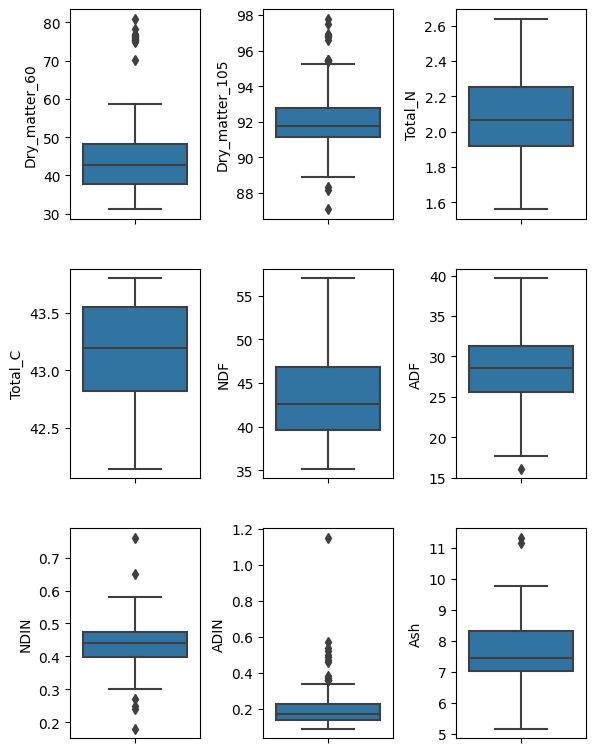

In [35]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(6,8))
fig.tight_layout(pad=1.5)
# Flatten the axs array to make it easier to iterate over
axs = axs.flatten()

# Loop over each numeric column and create a boxplot in the corresponding axis
index = 0
for column in tmr.columns:
    if tmr[column].dtype == 'float64':
        sns.boxplot(y=tmr[column], ax=axs[index])
        #axs[index].axhline(tmr[column].mean(), color='r', linestyle='--')
        #axs[index].set_title(column)
        index += 1

plt.show()

## Check heifer placement period

In [36]:
tmr_period = pd.DataFrame(columns=['start_date', 'end_date', 'diff_days','start_row','end_row'])

start_date = tmr['Date'][0]
start_row = 0
row = 0
for i in range(len(tmr['Date'])-1):
    if i == len(tmr['Date'])-2:
        end_date = tmr['Date'][i+1]
        diff = (end_date - start_date)/ np.timedelta64(1, 'D') + 1
        tmr_period.loc[row] = [start_date, end_date, diff, start_row, i]
        start_date = tmr['Date'][i+1]
        start_row = i+1
        row += 1
    if (tmr['Date'][i+1] - tmr['Date'][i])/ np.timedelta64(1, 'D') > 1:
        end_date = tmr['Date'][i]
        diff = (end_date - start_date)/ np.timedelta64(1, 'D') + 1
        tmr_period.loc[row] = [start_date, end_date, diff, start_row, i]
        start_date = tmr['Date'][i+1]
        start_row = i+1
        row += 1
tmr_period

,start_date,end_date,diff_days,start_row,end_row
0,2010-09-22,2010-10-24,33.0,0,32
1,2011-05-25,2011-06-16,23.0,33,55
2,2011-10-04,2011-10-17,14.0,56,69
3,2012-04-30,2012-05-06,7.0,70,76
4,2012-06-21,2012-06-27,7.0,77,83
5,2012-08-21,2012-08-27,7.0,84,90
6,2012-10-16,2012-10-21,6.0,91,96
7,2013-06-11,2013-06-17,7.0,97,103
8,2013-07-10,2013-07-15,6.0,104,109
9,2013-09-17,2013-09-23,7.0,110,116


## Calculate mean TMR data groupby heifer placement period

In [37]:
import warnings
warnings.filterwarnings('ignore')

tmr_averaged = pd.DataFrame(columns=['start_date', 'end_date', 'diff_days','Dry_matter_60', 'Dry_matter_105', 'Total_N', 'Total_C', 'NDF', 'ADF', 'NDIN', 'ADIN', 'Ash'])

tmr_data = np.zeros((19,9))
for i in range(19):
    start = tmr_period.iloc[i]['start_row']
    end = tmr_period.iloc[i]['end_row'] + 1
    tmr_data[i,:] =  tmr.iloc[start:end].mean()

tmr_averaged['start_date'] = tmr_period['start_date']
tmr_averaged['end_date'] = tmr_period['end_date']
tmr_averaged['diff_days'] = tmr_period['diff_days']
tmr_averaged['Dry_matter_60'] = tmr_data[:,0]
tmr_averaged['Dry_matter_105'] = tmr_data[:,1]
tmr_averaged['Total_N'] = tmr_data[:,2]
tmr_averaged['Total_C'] = tmr_data[:,3]
tmr_averaged['NDF'] = tmr_data[:,4]
tmr_averaged['ADF'] = tmr_data[:,5]
tmr_averaged['NDIN'] = tmr_data[:,6]
tmr_averaged['ADIN'] = tmr_data[:,7]
tmr_averaged['Ash'] = tmr_data[:,8]
tmr_averaged

,start_date,end_date,diff_days,Dry_matter_60,Dry_matter_105,Total_N,Total_C,NDF,ADF,NDIN,ADIN,Ash
0,2010-09-22,2010-10-24,33.0,39.899697,92.525455,2.258485,NaN,39.866364,24.773030,0.429394,0.166970,7.280606
1,2011-05-25,2011-06-16,23.0,42.725652,91.110870,1.853043,43.137826,52.613043,32.470000,0.457826,0.150435,7.647391
2,2011-10-04,2011-10-17,14.0,35.451429,91.609286,2.299286,NaN,39.229286,31.933571,0.366429,0.380714,6.406429
3,2012-04-30,2012-05-06,7.0,41.501429,91.652857,1.952857,NaN,42.514286,29.855714,0.365714,0.265000,7.781429
4,2012-06-21,2012-06-27,7.0,48.115714,91.077143,2.261429,NaN,41.341429,38.755714,0.491429,0.507143,6.820000
5,2012-08-21,2012-08-27,7.0,35.958571,97.034286,2.485714,NaN,41.848571,23.955714,0.572857,NaN,9.885714
6,2012-10-16,2012-10-21,6.0,47.135000,93.220000,2.223333,NaN,43.103333,23.128333,0.301667,NaN,7.373333
7,2013-06-11,2013-06-17,7.0,46.718571,92.702857,1.830000,NaN,45.287143,28.070000,0.395714,0.120000,8.070000
8,2013-07-10,2013-07-15,6.0,51.490000,91.880000,1.740000,NaN,46.953333,29.226667,0.405000,0.131667,7.591667
9,2013-09-17,2013-09-23,7.0,52.727143,95.392857,1.997143,NaN,49.492857,31.627143,0.434286,0.180000,8.461429


In [39]:
tmr_averaged.drop(['Total_C','NDIN','ADIN'],axis=1,inplace = True)
tmr.drop(['Total_C','NDIN','ADIN'],axis=1,inplace = True)

## Impute NaN with mean

In [40]:
# check null first
tmr.isnull().sum()

Date              0
Dry_matter_60     1
Dry_matter_105    1
Total_N           1
NDF               1
ADF               1
Ash               1
dtype: int64

In [41]:
tmr.loc[tmr['Dry_matter_60'].isnull(),tmr.columns[1:]]  =  tmr_averaged[(tmr_averaged['start_date'].dt.year == 2015) & (tmr_averaged['start_date'].dt.month == 10) ].iloc[:,3:].values.tolist()

In [42]:
# cleared
tmr.isnull().sum()

Date              0
Dry_matter_60     0
Dry_matter_105    0
Total_N           0
NDF               0
ADF               0
Ash               0
dtype: int64

# GHG


In [43]:
ghg = pd.read_csv('BYD_GHG.csv')
ghg['Date'] = pd.to_datetime(ghg['Date'], format='%Y-%m-%d') #convert string to datetime
ghg['Month'] = ghg['Date'].dt.month
ghg

,Date,Barnyard,Surface,Frame,Sub_frame,Timing,Days_elapsed,Temp,CO2_mgC,CH4_mgC,NH3_ugN,N2O_ugN,CO2_mg,CH4_mg,NH3_mg,N2O_mg,CO2_eq,Month
0,2011-05-17,1,SOIL,A,M,BEFORE,205,15.3,183.0,0.699,140.0,2730.0,670.0,0.932,0.1700,4.290,1970.0,5
1,2011-05-17,1,SOIL,B,M,BEFORE,205,16.2,260.0,1.250,46.8,1800.0,952.0,1.660,0.0568,2.820,1830.0,5
2,2011-05-17,2,SOIL,A,M,BEFORE,205,16.4,316.0,3.480,196.0,3960.0,1160.0,4.640,0.2380,6.230,3130.0,5
3,2011-05-17,2,SOIL,B,M,BEFORE,205,16.5,305.0,3.420,425.0,6390.0,1120.0,4.570,0.5170,10.000,4230.0,5
4,2011-05-17,3,SOIL,A,M,BEFORE,205,18.7,317.0,4.610,702.0,1500.0,1160.0,6.150,0.8520,2.350,2020.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2162,2015-10-21,8,BARK,D,A,AFTER,1,19.8,169.0,8.070,6290.0,358.0,621.0,10.800,7.6400,0.562,1080.0,10
2163,2015-10-21,9,BARK,C,M,AFTER,1,19.7,246.0,8.090,6410.0,303.0,900.0,10.800,7.7800,0.476,1330.0,10
2164,2015-10-21,9,BARK,D,M,AFTER,1,19.8,169.0,NaN,NaN,1460.0,619.0,NaN,NaN,2.300,NaN,10
2165,2015-10-21,9,BARK,C,A,AFTER,1,19.9,161.0,9.340,5780.0,205.0,589.0,12.500,7.0100,0.323,1020.0,10


In [ ]:
print(ghg.shape)
ghg.info()

(2167, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2167 entries, 0 to 2166
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          2167 non-null   datetime64[ns]
 1   Barnyard      2167 non-null   int64         
 2   Surface       2167 non-null   object        
 3   Frame         2167 non-null   object        
 4   Sub_frame     2167 non-null   object        
 5   Timing        2167 non-null   object        
 6   Days_elapsed  2167 non-null   int64         
 7   Temp          2166 non-null   float64       
 8   CO2_mgC       1985 non-null   float64       
 9   CH4_mgC       1940 non-null   float64       
 10  NH3_ugN       826 non-null    float64       
 11  N2O_ugN       1810 non-null   float64       
 12  CO2_mg        1985 non-null   float64       
 13  CH4_mg        1940 non-null   float64       
 14  NH3_mg        826 non-null    float64       
 15  N2O_mg        1810 non-null

In [ ]:
ghg.isnull().sum()

Date               0
Barnyard           0
Surface            0
Frame              0
Sub_frame          0
Timing             0
Days_elapsed       0
Temp               1
CO2_mgC          182
CH4_mgC          227
NH3_ugN         1341
N2O_ugN          357
CO2_mg           182
CH4_mg           227
NH3_mg          1341
N2O_mg           357
CO2_eq          1566
Month              0
dtype: int64

ghg has 2167 rows, but for some features, more than the half of the observations are NaN, and I believe they are not helpful to our prediction task, so I directly drop these features. And Our project will only focus on the estimation of CH4, since this is a major GHG emission in agriculture sector

In [45]:
ghg = ghg.drop(['CO2_mgC', 'CH4_mgC', 'NH3_ugN', 'N2O_ugN',
       'CO2_mg', 'NH3_mg', 'N2O_mg','CO2_eq'], axis=1)


In [46]:
ghg.isnull().sum()

Date              0
Barnyard          0
Surface           0
Frame             0
Sub_frame         0
Timing            0
Days_elapsed      0
Temp              1
CH4_mg          227
Month             0
dtype: int64

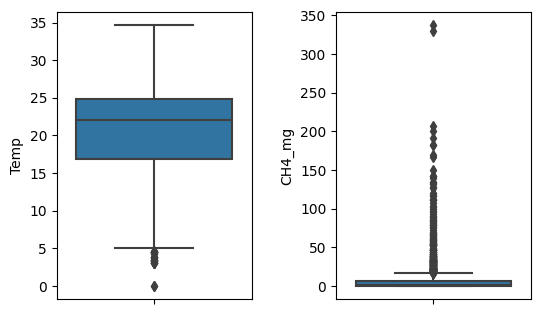

In [51]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(6,4))
fig.tight_layout(pad=3.0)
# Flatten the axs array to make it easier to iterate over
axs = axs.flatten()

# Loop over each numeric column and create a boxplot in the corresponding axis
index = 0
for column in ghg.columns:
    if ghg[column].dtype == 'float64':
        sns.boxplot(y=ghg[column], ax=axs[index])
        #axs[index].axhline(tmr[column].mean(), color='r', linestyle='--')
        #axs[index].set_title(column)
        index += 1

plt.show()

## Calculate median GHG emission groupby Month, Barnyard, Frame, and Sub_frame

In [65]:
ghg['Date'].dt.month.value_counts().sort_index()

5     254
6     491
7     389
8     207
9     311
10    451
11     64
Name: Date, dtype: int64

In [66]:
ghg_cols = ['Temp',  'CH4_mg']
ghg_averaged = pd.DataFrame(columns = ghg_cols)
row = 0
index = [] # store the descriptive index
months = [5,6,7,8,9,10,11]
for month in months:
    for barnyard in range(1,10):
        for time in ['M','A']:
            subframe = ghg[(ghg['Barnyard'] == barnyard) & (ghg['Date'].dt.month == month) & (ghg['Sub_frame'] == time)]
            index.append('M-'+str(month) + '-B-'+str(barnyard)+'-S-'+time)
            ghg_averaged.loc[row] = subframe[ghg_cols].mean()
            row += 1
ghg_averaged.insert(0,'index',index)     
ghg_averaged.to_csv('ghg_averaged.csv', index=False)   
ghg_averaged 

,index,Temp,CH4_mg
0,M-5-B-1-S-M,16.828571,3.899793
1,M-5-B-1-S-A,18.585714,3.557683
2,M-5-B-2-S-M,17.533333,6.497575
3,M-5-B-2-S-A,18.875000,3.226660
4,M-5-B-3-S-M,16.793750,7.700336
...,...,...,...
121,M-11-B-7-S-A,10.650000,0.138450
122,M-11-B-8-S-M,10.250000,0.260500
123,M-11-B-8-S-A,10.875000,0.219500
124,M-11-B-9-S-M,11.200000,0.085030


## Impute by Mean

In [67]:
for i in range(len(ghg)):
    barnyard = ghg.iloc[i]['Barnyard']
    month = ghg.iloc[i]['Date'].month
    time = ghg.iloc[i]['Sub_frame']
    index = 'M-'+str(month) + '-B-'+str(barnyard)+'-S-'+time
    for col in ghg_cols:
        if pd.isnull(ghg.iloc[i][col]):
            ghg.at[i,col] = ghg_averaged[ghg_averaged['index'] == index][col]

In [68]:
ghg.isnull().sum() # address later

Date            0
Barnyard        0
Surface         0
Frame           0
Sub_frame       0
Timing          0
Days_elapsed    0
Temp            0
CH4_mg          2
Month           0
dtype: int64

# Intake

In [58]:
intake = pd.read_csv('BYD_Intake.csv')
print('# of observations in original dataset:',intake.shape[0] )
print('# of observations where refusals = 0 :',intake[intake['Refusals'] == 0].shape[0])
print('# of observations where 0 < refusal < 1:',intake[(intake['Refusals'] > 0) & (intake['Refusals'] < 1)].shape[0])

# of observations in original dataset: 1764
# of observations where refusals = 0 : 1378
# of observations where 0 < refusal < 1: 57


# Merge Dataset

In [73]:
ghg

,Date,Barnyard,Surface,Frame,Sub_frame,Timing,Days_elapsed,Temp,CH4_mg,Month
0,2011-05-17,1,SOIL,A,M,BEFORE,205,15.3,0.9320,5
1,2011-05-17,1,SOIL,B,M,BEFORE,205,16.2,1.6600,5
2,2011-05-17,2,SOIL,A,M,BEFORE,205,16.4,4.6400,5
3,2011-05-17,2,SOIL,B,M,BEFORE,205,16.5,4.5700,5
4,2011-05-17,3,SOIL,A,M,BEFORE,205,18.7,6.1500,5
...,...,...,...,...,...,...,...,...,...,...
2162,2015-10-21,8,BARK,D,A,AFTER,1,19.8,10.8000,10
2163,2015-10-21,9,BARK,C,M,AFTER,1,19.7,10.8000,10
2164,2015-10-21,9,BARK,D,M,AFTER,1,19.8,1.8931,10
2165,2015-10-21,9,BARK,C,A,AFTER,1,19.9,12.5000,10


### [Discarded] > Code used to calculate the GHG variation

In [76]:
'''
#ghg_period = pd.DataFrame()
def check_valid(df):
    valid = pd.DataFrame(columns = ghg.columns)
    row=0
    for i in range(len(df)-1):
        if df.iloc[i]['Timing'] == 'BEFORE' and df.iloc[i+1]['Timing'] == 'AFTER':
            valid.loc[row] = df.iloc[i]
            valid.loc[row+1] = df.iloc[i+1]
            row += 2
    return valid

def match_ghg(valid): 
    if ghg_period.shape[0] == 0:
        row = 0
    else:
        row = ghg_period.shape[0] + 1
    #print(row)
    for i in range(0,len(valid),2):
        time = np.array([valid.iloc[i]['Date'],valid.iloc[i+1]['Date']])
        barnyard = np.array(valid.iloc[i][['Barnyard','Surface','Frame','Sub_frame']])
        #print(barnyard)
        ghg_data = valid.iloc[i+1][[ 'CH4_mg']] - valid.iloc[i][['CH4_mg']]
        info = np.concatenate((time,barnyard,ghg_data),axis = 0)
        ghg_period.loc[row] = info
        row += 1
'''

ghg[(ghg['Barnyard'] == 1) & (ghg['Frame']=='A') & (ghg['Sub_frame']=='M')]
# 2012-05-09, only AFTER, no BEFORE
# 2012-10-03, only BEFORE, no AFTER

,Date,Barnyard,Surface,Frame,Sub_frame,Timing,Days_elapsed,Temp,CH4_mg,Month
0,2011-05-17,1,SOIL,A,M,BEFORE,205,15.3,0.932000,5
55,2011-06-07,1,SOIL,A,M,AFTER,0,32.7,3.340000,6
144,2011-07-12,1,SOIL,A,M,BEFORE,26,22.6,3.090000,7
214,2011-08-31,1,SOIL,A,M,AFTER,1,27.6,4.630000,8
270,2011-09-30,1,SOIL,A,M,BEFORE,30,13.0,0.354000,9
330,2011-10-19,1,SOIL,A,M,AFTER,1,6.1,8.960000,10
396,2012-05-09,1,SOIL,A,M,AFTER,2,13.6,22.200000,5
486,2012-06-28,1,SOIL,A,M,AFTER,0,30.1,10.500000,6
538,2012-08-17,1,SOIL,A,M,BEFORE,51,18.9,3.530000,8
596,2012-08-29,1,SOIL,A,M,AFTER,1,26.9,16.000000,8


## Merge Surface with GHG based on Date

In [ ]:
ghg_surface = ghg
ghg_surface[surface_cols] = np.nan
ghg_surface.columns

Index(['Date', 'Barnyard', 'Surface', 'Frame', 'Sub_frame', 'Timing',
       'Days_elapsed', 'Temp', 'CH4_mg', 'N2O_mg', 'Month', 'Dry_matter',
       'Water', 'pH', 'NH4-N', 'NO3-N', 'Total_N', 'Total_C', 'Ash',
       'Organic_matter'],
      dtype='object')

### Check GHG date and Surface date

In [ ]:
print(surface['Date'].value_counts().sort_index())

print(ghg['Date'].value_counts().sort_index())


2010-05-26     9
2011-10-20     9
2012-04-19     9
2012-04-24    12
2012-06-24     9
2012-10-03     9
2012-10-25    17
2013-04-26    18
2013-06-06     9
2013-06-20     9
2013-07-08     9
2013-07-18     9
2013-09-12     9
2013-09-25     9
2013-09-26     9
2013-10-24     9
2013-11-05     9
2014-06-05     9
2014-06-19     9
2014-07-10     9
2014-07-23     9
2014-09-11     9
2014-09-26     9
2014-10-08     9
2015-04-14     9
2015-04-27     9
2015-05-08     9
2015-05-21     9
2015-06-22     9
2015-06-30     9
2015-07-16     9
2015-07-29     9
2015-10-12     9
2015-10-21     9
Name: Date, dtype: int64
2011-05-17    18
2011-05-19    18
2011-05-23    19
2011-06-07    13
2011-06-08    12
              ..
2015-07-20    31
2015-10-09    36
2015-10-12    36
2015-10-20    36
2015-10-21    35
Name: Date, Length: 80, dtype: int64


### Merge surface with GHG based on exactly same date(year & month & day), same barnyard

In [ ]:
for i in range(len(ghg_surface)):
    ghg_date = ghg_surface.iloc[i]['Date']
    ghg_barn = ghg_surface.iloc[i]['Barnyard']
    data = surface[(surface['Barnyard'] == ghg_barn) & (surface['Date'].dt.year == ghg_date.year)& (surface['Date'].dt.month == ghg_date.month) & (surface['Date'].dt.day == ghg_date.day)][surface_cols].mean()
    ghg_surface.loc[i,surface_cols] = data


### Merge surface with GHG based on same year, same month, same barnyard only

In [ ]:
for i in range(len(ghg_surface)):
    ghg_date = ghg_surface.iloc[i]['Date']
    ghg_barn = ghg_surface.iloc[i]['Barnyard']
    if ghg_surface.loc[i,surface_cols].isnull().all(): # not merged yet     
        data = surface[(surface['Barnyard'] == ghg_barn) & (surface['Date'].dt.year == ghg_date.year)& (surface['Date'].dt.month == ghg_date.month)][surface_cols].mean()
        ghg_surface.loc[i,surface_cols] = data

### Merge surface with GHG based on same month, same barnyard, median over year

In [ ]:
for i in range(len(ghg_surface)):
    ghg_month = ghg_surface.iloc[i]['Date'].month
    ghg_barn = ghg_surface.iloc[i]['Barnyard']
    if ghg_surface.loc[i,surface_cols].isnull().all() and (ghg_month,ghg_barn) in surface_median.index: # not merged yet, has surface_median data
      data = surface_median.loc[(ghg_month,ghg_barn)]
      ghg_surface.loc[i,surface_cols] = data


### Check the merged GHG_Surface

In [ ]:
ghg_surface.isnull().sum()

Date                0
Barnyard            0
Surface             0
Frame               0
Sub_frame           0
Timing              0
Days_elapsed        0
Temp                0
CH4_mg              2
N2O_mg              0
Month               0
Dry_matter          0
Water               0
pH                  0
NH4-N               0
NO3-N               0
Total_N             0
Total_C             0
Ash               207
Organic_matter    207
dtype: int64

In [ ]:
# rename the column
ghg_surface.rename(columns={'Dry_matter': 'surface_dry_matter',
                    'Total_N':'surface_Total_N',
                    'Total_C':'surface_Total_C',
                    'Ash':'surface_Ash'}, inplace=True)   

In [ ]:
ghg_surface.to_csv('ghg_surface.csv', index=False)

## Merge TMR with GHG based on Date

In [ ]:
tmr_cols = ['Dry_matter_60', 'Dry_matter_105', 'Total_N', 'NDF', 'ADF','Ash']
ghg_surface_tmr = ghg_surface
ghg_surface_tmr [tmr_cols] = np.nan # initialize as NaN
ghg_surface_tmr 

,Date,Barnyard,Surface,Frame,Sub_frame,Timing,Days_elapsed,Temp,CH4_mg,N2O_mg,...,surface_Total_N,surface_Total_C,surface_Ash,Organic_matter,Dry_matter_60,Dry_matter_105,Total_N,NDF,ADF,Ash
0,2011-05-17,1,SOIL,A,M,BEFORE,205,15.3,0.9320,4.290,...,0.40,4.38,87.96,12.04,NaN,NaN,NaN,NaN,NaN,NaN
1,2011-05-17,1,SOIL,B,M,BEFORE,205,16.2,1.6600,2.820,...,0.40,4.38,87.96,12.04,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-05-17,2,SOIL,A,M,BEFORE,205,16.4,4.6400,6.230,...,0.39,4.21,88.22,11.78,NaN,NaN,NaN,NaN,NaN,NaN
3,2011-05-17,2,SOIL,B,M,BEFORE,205,16.5,4.5700,10.000,...,0.39,4.21,88.22,11.78,NaN,NaN,NaN,NaN,NaN,NaN
4,2011-05-17,3,SOIL,A,M,BEFORE,205,18.7,6.1500,2.350,...,0.35,3.91,88.72,11.28,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2162,2015-10-21,8,BARK,D,A,AFTER,1,19.8,10.8000,0.562,...,1.57,38.19,20.26,79.74,NaN,NaN,NaN,NaN,NaN,NaN
2163,2015-10-21,9,BARK,C,M,AFTER,1,19.7,10.8000,0.476,...,1.74,35.57,24.33,75.67,NaN,NaN,NaN,NaN,NaN,NaN
2164,2015-10-21,9,BARK,D,M,AFTER,1,19.8,1.8931,2.300,...,1.74,35.57,24.33,75.67,NaN,NaN,NaN,NaN,NaN,NaN
2165,2015-10-21,9,BARK,C,A,AFTER,1,19.9,12.5000,0.323,...,1.74,35.57,24.33,75.67,NaN,NaN,NaN,NaN,NaN,NaN


### Impute exact TMR data if GHG has the same measurement date with TMR date

In [ ]:
for i in range(len(ghg_surface_tmr)):
    ghg_date = ghg_surface_tmr.iloc[i]['Date']
    for j in range(len(tmr)):
        tmr_date = tmr.iloc[j]['Date']
        if ghg_date.year == tmr_date.year and ghg_date.month == tmr_date.month and ghg_date.day == tmr_date.day:
            ghg_surface_tmr.loc[i,tmr_cols] = tmr.iloc[j][tmr_cols]
            

### Impute averaged TMR data if GHG has the same year and month with TMR date

In [ ]:
for i in range(len(ghg_surface_tmr)):
    ghg_date = ghg_surface_tmr.iloc[i]['Date']
    for j in range(len(tmr_averaged)):
        tmr_start = tmr_averaged.iloc[j]['start_date']
        tmr_end = tmr_averaged.iloc[j]['end_date']
        if (ghg_surface_tmr.loc[i,tmr_cols].isnull().all()) and (ghg_date.year == tmr_start.year == tmr_end.year) and (ghg_date.month == tmr_start.month or ghg_date.month == tmr_end.month): 
            ghg_surface_tmr.loc[i,tmr_cols] = tmr_averaged.iloc[j][tmr_cols]
            

### Check aggregated dataset(GHG + Surface + TMR)

In [ ]:
print(ghg_surface_tmr.shape)
ghg_surface_tmr.isnull().sum()

(2167, 26)


Date                    0
Barnyard                0
Surface                 0
Frame                   0
Sub_frame               0
Timing                  0
Days_elapsed            0
Temp                    0
CH4_mg                  2
N2O_mg                  0
Month                   0
surface_dry_matter      0
Water                   0
pH                      0
NH4-N                   0
NO3-N                   0
surface_Total_N         0
surface_Total_C         0
suface_Ash            207
Organic_matter        207
Dry_matter_60         286
Dry_matter_105        286
Total_N               286
NDF                   286
ADF                   286
Ash                   286
dtype: int64

In [ ]:
# No 'Ash' or 'Organic_matter' data on any sampling day in August
ghg_surface[ghg_surface['Organic_matter'].isnull()]['Date'].unique()  

array(['2011-08-31T00:00:00.000000000', '2012-08-17T00:00:00.000000000',
       '2012-08-20T00:00:00.000000000', '2012-08-29T00:00:00.000000000',
       '2012-08-30T00:00:00.000000000', '2014-08-28T00:00:00.000000000',
       '2014-08-29T00:00:00.000000000'], dtype='datetime64[ns]')

In [ ]:
ghg_surface_tmr[ghg_surface_tmr['Dry_matter_60'].isnull()]['Date'].unique()

array(['2011-07-12T00:00:00.000000000', '2011-07-13T00:00:00.000000000',
       '2011-08-31T00:00:00.000000000', '2011-09-02T00:00:00.000000000',
       '2011-09-08T00:00:00.000000000', '2011-09-30T00:00:00.000000000',
       '2013-11-04T00:00:00.000000000', '2013-11-05T00:00:00.000000000',
       '2014-08-28T00:00:00.000000000', '2014-08-29T00:00:00.000000000'],
      dtype='datetime64[ns]')

It turns out we do not have any feeding data for 2011-07, 2011-09; 2011-10, ....

In [ ]:
ghg_surface_tmr_cleaned = ghg_surface_tmr.dropna()

In [ ]:
ghg_surface_tmr_cleaned.rename(columns={'Dry_matter_60': 'tmr_Dry_matter_60',
                                'Dry_matter_105': 'tmr_Dry_matter_105',
                                'Total_N': 'tmr_Total_N',
                                'NDF': 'tmr_NDF',
                                'ADF': 'tmr_ADF',
                                'Ash': 'tmr_Ash'}, inplace=True)   

In [ ]:
print(ghg_surface_tmr_cleaned.shape)
ghg_surface_tmr_cleaned.to_csv('ghg_cleaned.csv',index=False)
ghg_surface_tmr_cleaned.isnull().sum()

(1762, 26)


Date                  0
Barnyard              0
Surface               0
Frame                 0
Sub_frame             0
Timing                0
Days_elapsed          0
Temp                  0
CH4_mg                0
N2O_mg                0
Month                 0
surface_dry_matter    0
Water                 0
pH                    0
NH4-N                 0
NO3-N                 0
surface_Total_N       0
surface_Total_C       0
surface_Ash           0
Organic_matter        0
tmr_Dry_matter_60     0
tmr_Dry_matter_105    0
tmr_Total_N           0
tmr_NDF               0
tmr_ADF               0
tmr_Ash               0
dtype: int64

# Inspect Dataset

In [4]:
# read Datset
ghg_cleaned = pd.read_csv('ghg_cleaned.csv')
ghg_cleaned['Date'] = pd.to_datetime(ghg_cleaned['Date'], format='%m/%d/%y') #convert string to datetime
ghg_cleaned['Year'] = ghg_cleaned['Date'].dt.year
ghg_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1762 entries, 0 to 1761
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                1762 non-null   datetime64[ns]
 1   Barnyard            1762 non-null   int64         
 2   Surface             1762 non-null   object        
 3   Frame               1762 non-null   object        
 4   Sub_frame           1762 non-null   object        
 5   Timing              1762 non-null   object        
 6   Days_elapsed        1762 non-null   int64         
 7   Temp                1762 non-null   float64       
 8   CH4_mg              1762 non-null   float64       
 9   Month               1762 non-null   int64         
 10  surface_dry_matter  1762 non-null   float64       
 11  Water               1762 non-null   float64       
 12  pH                  1762 non-null   float64       
 13  NH4-N               1762 non-null   float64     

In [5]:
def split_X_y(ghg_cleaned):
  X = ghg_cleaned.drop(['CH4_mg'],axis = 1)  # drop our target variables
  X = X.drop(['Frame', 'Days_elapsed', 'Date','Barnyard'],axis=1)  # drop irrelevant features
  y = ghg_cleaned['CH4_mg']

  one_hot = pd.get_dummies(ghg_cleaned[['Surface','Sub_frame','Timing']])
  X = pd.concat([X, one_hot], axis=1)

  X = X.drop(['Surface','Sub_frame','Timing'],axis=1)

  return X,y


## Linear regression with original dataset - Low performance

In [6]:
evaluation = pd.DataFrame(columns=['Model','R2','RMSE','MAE'])

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

X, y = split_X_y(ghg_cleaned)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)

rmse = format(mean_squared_error(y_test,y_pred,squared=False),".4f")
r2 = format(model.score(X_test,y_test),".4f")
mae = format(mean_absolute_error(y_test, y_pred),".4f")

print('rSqr:',r2)
print('rmse:',rmse)
print("mae:", mae)
evaluation.loc[0] = ['Origninal_linear_reg',r2,rmse,mae]



rSqr: 0.0674
rmse: 29.7323
mae: 11.4226


## Add feature: previous year

In [8]:
check = ghg_cleaned.groupby(['Date', 'Barnyard', 'Sub_frame', 'Timing'])['CH4_mg'].agg(['mean', 'std','max','min'])
check['range'] = check['max']-check['min']
check[check['std']>5]

mean        std   max        min  \
Date       Barnyard Sub_frame Timing                                          
2011-05-23 2        M         BEFORE   9.945000  12.381440  18.7   1.190000   
           3        M         BEFORE  18.450000   7.424621  23.7  13.200000   
2011-06-07 3        M         AFTER   19.444404   8.846748  25.7  13.188809   
           5        M         AFTER    9.496500  12.025765  18.0   0.993000   
2011-06-08 7        A         AFTER   14.125000   9.864140  21.1   7.150000   
...                                         ...        ...   ...        ...   
2015-10-21 6        M         AFTER   19.850000  12.657211  28.8  10.900000   
           8        A         AFTER    5.765500   7.119858  10.8   0.731000   
                    M         AFTER    6.695000   8.916617  13.0   0.390000   
           9        A         AFTER    6.835000   8.011520  12.5   1.170000   
                    M         AFTER    6.346550   6.298129  10.8   1.893100   

                                          range  
Date       Barnyard Sub_frame Timing             
2011-05-23 2        M         BEFORE  17.510000  
           3        M         BEFORE  10.500000  
2011-06-07 3        M         AFTER   12.511191  
           5        M         AFTER   17.007000  
2011-06-08 7        A         AFTER   13.950000  
...                                         ...  
2015-10-21 6        M         AFTER   17.900000  
           8        A         AFTER   10.069000  
                    M         AFTER   12.610000  
           9        A         AFTER   11.330000  
                    M         AFTER    8.906900  

[223 rows x 5 columns]

In [9]:
ghg_cleaned_median = ghg_cleaned.groupby(['Year','Month','Barnyard','Sub_frame'])['CH4_mg'].median().reset_index()
ghg_cleaned_median

,Year,Month,Barnyard,Sub_frame,CH4_mg
0,2011,5,1,A,0.848500
1,2011,5,1,M,1.296000
2,2011,5,2,A,5.555000
3,2011,5,2,M,4.605000
4,2011,5,3,A,4.290000
...,...,...,...,...,...
317,2015,10,7,M,1.632860
318,2015,10,8,A,1.204848
319,2015,10,8,M,0.329500
320,2015,10,9,A,2.093260


In [10]:
for i in range(len(ghg_cleaned)):
  year = ghg_cleaned.iloc[i]['Year']
  month = ghg_cleaned.iloc[i]['Month']
  barn = ghg_cleaned.iloc[i]['Barnyard']
  sub_frame	= ghg_cleaned.iloc[i]['Sub_frame']
  prev = ghg_cleaned_median[(ghg_cleaned_median['Year'] == year-1) & (ghg_cleaned_median['Month'] == month) & (ghg_cleaned_median['Barnyard'] == barn) & (ghg_cleaned_median['Sub_frame'] == sub_frame) ]
  if not prev.empty:
    ghg_cleaned.at[i,'prev'] = prev['CH4_mg'].values


In [11]:
ghg_cleaned = ghg_cleaned.dropna()
ghg_cleaned.isnull().sum()
print(ghg_cleaned.shape)

(1170, 27)


### Linear regression after adding prev - improve a lot

In [12]:
X, y = split_X_y(ghg_cleaned)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)

rmse = format(mean_squared_error(y_test,y_pred,squared=False),'.4f')
r2 = format(model.score(X_test,y_test),'.4f')
mae = format(mean_absolute_error(y_test, y_pred),'.4f')

print('rSqr:',r2)
print('rmse:',rmse)
print('mae:',mae)
evaluation.loc[1] = ['add_prev',r2,rmse,mae]


rSqr: 0.2805
rmse: 22.5335
mae: 11.6385


## Inspect target variable

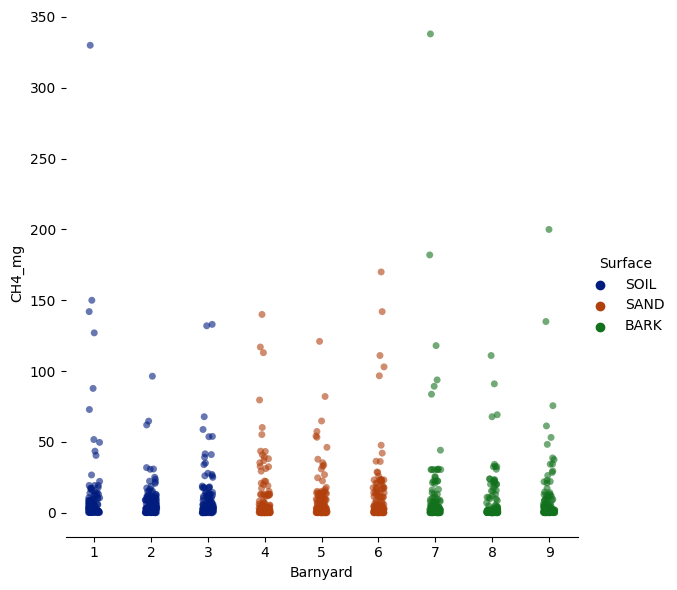

In [13]:
import seaborn as sns

g = sns.catplot(
    data=ghg_cleaned[['Barnyard', 'CH4_mg', 'Surface', 'Frame']], 
    kind="strip",
    x="Barnyard", y="CH4_mg", hue="Surface", 
    #col='Surface',
    errorbar="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)

Text(0.5, 1.0, 'Histogram for CH4_mg')

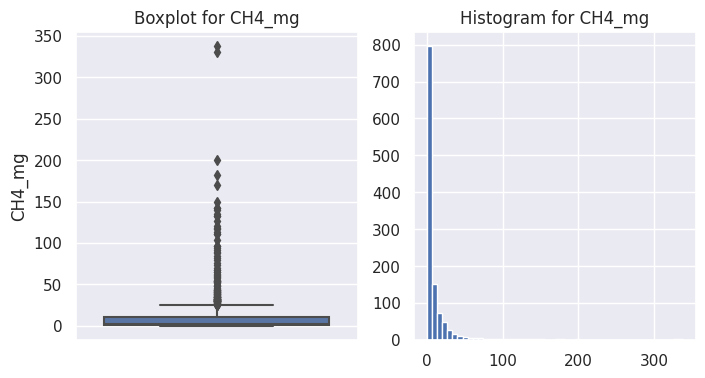

In [155]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

plt.subplot(1,2,1)
sns.boxplot(y=ghg_cleaned['CH4_mg'])
plt.title('Boxplot for CH4_mg')

plt.subplot(1,2,2)
ghg_cleaned['CH4_mg'].hist(bins=50)
plt.title('Histogram for CH4_mg')

## Drop outliers

In [14]:
ghg_cleaned = ghg_cleaned[ghg_cleaned['CH4_mg'] < 50]

X, y = split_X_y(ghg_cleaned)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)
rmse = format(mean_squared_error(y_test,y_pred,squared=False),'.4f')
r2 = format(model.score(X_test,y_test),'.4f')
mae = format(mean_absolute_error(y_test, y_pred),'.4f')

print('rSqr:',r2)
print('rmse:',rmse)
print('mae:',mae)

evaluation.loc[2] = ['drop_outliers',r2,rmse,mae]

rSqr: 0.3455
rmse: 7.1214
mae: 5.0049


# Build Model

## Ridge Regression


In [15]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
y_pred = ridge_reg.predict(X_test)

rmse = format(mean_squared_error(y_test, y_pred, squared=False),'.4f')
print("Ridge Regression RMSE:", rmse)

r2 = format(r2_score(y_test, y_pred),'.4f')
print("Ridge Regression R2 score:", r2)

mae = format(mean_absolute_error(y_test, y_pred),'.4f')
print("Ridge Regression MAE:", mae)

evaluation.loc[3] = ['ridge',r2,rmse,mae]

Ridge Regression RMSE: 7.1252
Ridge Regression R2 score: 0.3448
Ridge Regression MAE: 5.0082


## Lasso Regression

In [16]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)
y_pred = lasso_reg.predict(X_test)

rmse = format(mean_squared_error(y_test, y_pred, squared=False),'.4f')
print("Lasso Regression RMSE:", rmse)

r2 = format(r2_score(y_test, y_pred),'.4f')
print("Lasso Regression R2 score:", r2)

mae = format(mean_absolute_error(y_test, y_pred),'.4f')
print("Lasso Regression MAE:", mae)

evaluation.loc[4] = ['lasso',r2,rmse,mae]


Lasso Regression RMSE: 8.1073
Lasso Regression R2 score: 0.1517
Lasso Regression MAE: 5.8875


## Decision Tree Model

In [17]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=3, random_state=0)
tree_reg.fit(X_train, y_train)
y_pred = tree_reg.predict(X_test)

rmse = format(mean_squared_error(y_test, y_pred,squared=False),'.4f')
print('Decision Tree RMSE:', rmse)

r2 = format(r2_score(y_test, y_pred),'.4f')
print("Decision Tree R2 score:", r2)

mae = format(mean_absolute_error(y_test, y_pred),'.4f')
print("Decision Tree MAE:", mae)

evaluation.loc[5] = ['decision_tree',r2,rmse,mae]


Decision Tree RMSE: 7.7018
Decision Tree R2 score: 0.2344
Decision Tree MAE: 5.5326


## Adaboost

In [18]:

from sklearn.ensemble import AdaBoostRegressor

tree_reg = DecisionTreeRegressor(max_depth=3,random_state=0)
ada_reg = AdaBoostRegressor(base_estimator=tree_reg, n_estimators=100,random_state=0)
ada_reg.fit(X_train, y_train)
y_pred = ada_reg.predict(X_test)


rmse = format(mean_squared_error(y_test, y_pred,squared=False),'.2f')
print('Adaboost RMSE:', rmse)

r2 = format(r2_score(y_test, y_pred),'.2f')
print('Adaboost R2 Score:', r2)

mae = format(mean_absolute_error(y_test, y_pred),'.2f')
print("Adaboost MAE:", mae)

evaluation.loc[5] = ['adaboost',r2,rmse,mae]


Adaboost RMSE: 7.41
Adaboost R2 Score: 0.29
Adaboost MAE: 5.66


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


## Random Forest

In [19]:
from sklearn.ensemble import RandomForestRegressor


rf_reg = RandomForestRegressor(n_estimators=100, max_depth=5,random_state=0)
rf_reg.fit(X_train, y_train)
y_pred = rf_reg.predict(X_test)


rmse = format(mean_squared_error(y_test, y_pred,squared=False),'.4f')
r2 = format(r2_score(y_test, y_pred),'.4f')

print('Random Forest RMSE:', rmse)
print('Random Forest R2:', r2)

mae = format(mean_absolute_error(y_test, y_pred),'.4f')
print("Random Forest MAE:", mae)

evaluation.loc[6] = ['random_forest',r2,rmse,mae]

Random Forest RMSE: 7.0125
Random Forest R2: 0.3654
Random Forest MAE: 4.8742


## XGboost

In [20]:
from sklearn.metrics import r2_score
from xgboost import XGBRegressor

xgb_reg = XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=5, learning_rate=0.1)
xgb_reg.fit(X_train, y_train)
y_pred = xgb_reg.predict(X_test)


rmse = format(mean_squared_error(y_test, y_pred,squared=False),'.4f')
r2 = format(r2_score(y_test, y_pred),'.4f')
print('XGboost RMSE:', rmse)
print('XGboost R2:', r2)

mae = format(mean_absolute_error(y_test, y_pred),'.4f')
print("XGboost MAE:", mae)

evaluation.loc[7] = ['XGboost',r2,rmse,mae]

XGboost RMSE: 7.5037
XGboost R2: 0.2733
XGboost MAE: 4.9128


## Neuron Network

In [21]:
# Import the necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

In [22]:
import torch
import torch.nn as nn

class MyModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MyModel, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size, hidden_size)
        self.layer3 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = nn.functional.relu(self.layer1(x))
        x = nn.functional.relu(self.layer2(x))
        x = self.layer3(x)
        return x

# to tensor
X_tensor = torch.FloatTensor(X_train.to_numpy())
y_tensor = torch.FloatTensor(y_train.to_numpy())

model = MyModel(input_size=X_train.shape[1], hidden_size=8, output_size=1)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

num_epochs = 100
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(X_tensor)
    loss = criterion(outputs, y_tensor)
    loss.backward()
    optimizer.step()

y_pred = model(X_tensor).detach().numpy()
rmse = format(mean_squared_error(y_tensor.numpy(), y_pred, squared=False),'.4f')
r2 = format(r2_score(y_tensor.numpy(), y_pred),'.4f')

print('DNN RMSE:', rmse)
print('DNN R2:', r2)

mae = format(mean_absolute_error(y_tensor.numpy(), y_pred),'.4f')
print("DNN MAE:", mae)

evaluation.loc[8] = ['DNN',r2,rmse,mae]


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([897])) that is different to the input size (torch.Size([897, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


DNN RMSE: 9.3413
DNN R2: -0.0450
DNN MAE: 6.7482


## Plot - comparison across models

In [23]:
evaluation = evaluation.astype({'R2':'float','RMSE':'float','MAE':'float'})
evaluation 

,Model,R2,RMSE,MAE
0,Origninal_linear_reg,0.0674,29.7323,11.4226
1,add_prev,0.2805,22.5335,11.6385
2,drop_outliers,0.3455,7.1214,5.0049
3,ridge,0.3448,7.1252,5.0082
4,lasso,0.1517,8.1073,5.8875
5,adaboost,0.2900,7.4100,5.6600
6,random_forest,0.3654,7.0125,4.8742
7,XGboost,0.2733,7.5037,4.9128
8,DNN,-0.0450,9.3413,6.7482


In [24]:

import plotly.express as px

fig = px.bar(data_frame = evaluation ,
             x = "Model",
             y = 'R2',
             text_auto=True,
             title = "<b>R2</b>",width=600, height=400)

fig.update_layout(bargap = 0,
                  title_x = 0.5,
                  title_font = dict(size = 15),
                  uniformtext_minsize = 15,
                  margin=dict(l=20, r=20, t=30, b=20),
                  barmode = 'relative')


fig.update_traces(width=0.8)
fig.show()



In [80]:
fig = px.bar(data_frame = evaluation ,
             x = "Model",
             y = ['RMSE','MAE'],
             text_auto=True,
             title = "<b>RMSE and MAE</b>",width=800, height=500)

fig.update_layout(bargap = 0,
                  title_x = 0.45,
                  title_font = dict(size = 15),
                  uniformtext_minsize = 15,
                  margin=dict(l=20, r=20, t=30, b=15))
fig.update_traces(width=0.8)
fig.show()

# Hyperparameter tuning using RandomizedSearchCV

In [81]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameters and their ranges for the Random Forest model
params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [1, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create a Random Forest regressor object
rf_reg = RandomForestRegressor(random_state=0)

# Use RandomizedSearchCV to find the best hyperparameters
rf_random = RandomizedSearchCV(estimator = rf_reg, param_distributions = params, 
                               n_iter = 100, cv = 5, verbose=2, random_state=0, 
                               n_jobs = -1, scoring = 'neg_mean_squared_error')

# Fit the model to the training data
rf_random.fit(X_train, y_train)

# Print the best hyperparameters
print('Best Hyperparameters:', rf_random.best_params_)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 20}


In [96]:

rf_reg = RandomForestRegressor(n_estimators=200, 
                                min_samples_split=2, 
                                min_samples_leaf=5, 
                                max_features='sqrt',
                                max_depth=20, 
                               random_state=0)


rf_reg.fit(X_train, y_train)
y_pred = rf_reg.predict(X_test)


rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)


print('Random forest with tuned hyperparameter RMSE:', rmse)
print('Random forest with tuned hyperparameter R2:', r2)
print("Random forest with tuned hyperparameter mae:", mae)



Random forest with tuned hyperparameter RMSE: 6.969122302151468
Random forest with tuned hyperparameter R2: 0.37317980558056785
Random forest with tuned hyperparameter mae: 4.830415087441161


# Feature Importance

In [111]:
rf_reg = RandomForestRegressor(n_estimators=200, 
                                min_samples_split=2, 
                                min_samples_leaf=5, 
                                max_features='sqrt',
                                max_depth=20, 
                               random_state=0)

rf_reg.fit(X_train, y_train)
y_pred = rf_reg.predict(X_test)


# feature importances
feature_names = X_train.columns
importances = rf_reg.feature_importances_
indices = np.argsort(importances)[::-1]

# print feature importances
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))



Feature ranking:
1. Temp (0.111594)
2. tmr_Dry_matter_60 (0.096992)
3. Month (0.077539)
4. NO3-N (0.066352)
5. prev (0.052168)
6. tmr_Dry_matter_105 (0.050712)
7. Water (0.043571)
8. pH (0.041746)
9. surface_dry_matter (0.041392)
10. surface_Total_C (0.040267)
11. surface_Total_N (0.039147)
12. Organic_matter (0.038612)
13. surface_Ash (0.036026)
14. NH4-N (0.035893)
15. Timing_BEFORE (0.031593)
16. tmr_ADF (0.030166)
17. tmr_Ash (0.029675)
18. tmr_NDF (0.028912)
19. Timing_AFTER (0.028704)
20. Year (0.024689)
21. tmr_Total_N (0.024328)
22. Sub_frame_M (0.009533)
23. Sub_frame_A (0.008681)
24. Surface_SOIL (0.005750)
25. Surface_BARK (0.003970)
26. Surface_SAND (0.001988)


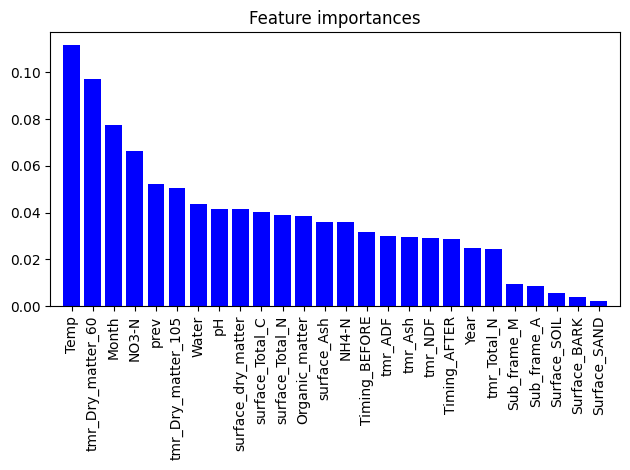

In [114]:
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color="b", align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()